In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split as TTS

import matplotlib.pyplot as plt
import seaborn as sb

In [8]:
data = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
data.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [10]:
x = data.iloc[:, 0:2]
y = data['Survived']

In [11]:
x.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [13]:
trainx, testx, triany, testy = TTS(x, y, test_size=0.2, random_state=42)

In [14]:
trainx

,Survived,Age
331,0,45.5
733,0,23.0
382,0,32.0
704,0,26.0
813,0,6.0
...,...,...
106,1,21.0
270,0,NaN
860,0,41.0
435,1,14.0


#**random value imputation in Numerical Data**

In [15]:
trainx['age_imputed'] = trainx['Age']
testx['age_imputed'] = testx['Age']

In [17]:
testx.head()

,Survived,Age,age_imputed
709,1,NaN,NaN
439,0,31.0,31.0
840,0,20.0,20.0
720,1,6.0,6.0
39,1,14.0,14.0


In [18]:
trainx['age_imputed'][trainx['age_imputed'].isnull()]

# printing the total null values present in trainx dataframe

,age_imputed
29,NaN
55,NaN
533,NaN
495,NaN
468,NaN
...,...
330,NaN
214,NaN
466,NaN
121,NaN


In [35]:
null_indices_train = trainx[trainx['age_imputed'].isnull()].index
# getting the null indexed values from dataframe
sampled_values_train = trainx['Age'].dropna().sample(len(null_indices_train), replace=True).values
# now getting the replaced values from random values of dataframe
trainx.loc[null_indices_train, 'age_imputed'] = sampled_values_train
# finally locating the random values in age_imputed column

null_indices_test = testx[testx['age_imputed'].isnull()].index
# getting the null indexed values from dataframe
sampled_values_test = testx['Age'].dropna().sample(len(null_indices_test), replace=True).values
# now getting the replaced values from random values of dataframe
testx.loc[null_indices_test, 'age_imputed'] = sampled_values_test
# finally locating the random values in age_imputed column

In [36]:
trainx

,Survived,Age,age_imputed
331,0,45.5,45.5
733,0,23.0,23.0
382,0,32.0,32.0
704,0,26.0,26.0
813,0,6.0,6.0
...,...,...,...
106,1,21.0,21.0
270,0,NaN,24.0
860,0,41.0,41.0
435,1,14.0,14.0


<Axes: >

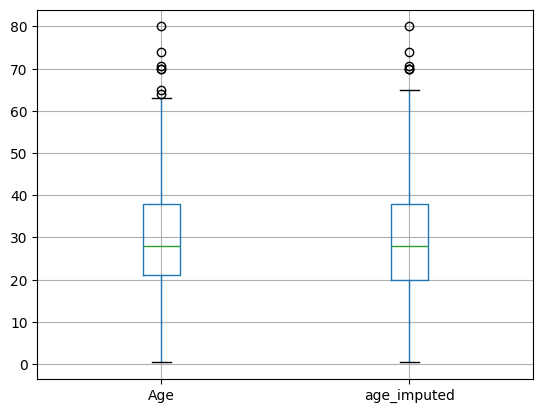

In [38]:
trainx[['Age', 'age_imputed']].boxplot()

#**random value imputation in Categorical Data**

In [40]:
numdata = pd.read_csv('house-train.csv', usecols = ['GarageQual', 'FireplaceQu', 'SalePrice'])
numdata.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [42]:
numdata.isnull().sum()

,0
FireplaceQu,690
GarageQual,81
SalePrice,0


In [43]:
x = numdata.iloc[:, :2]
y = numdata['SalePrice']

In [44]:
trainx, testx, trainy, testy = TTS(x, y, test_size = 0.2, random_state = 42)

In [45]:
trainx

,FireplaceQu,GarageQual
254,NaN,TA
1066,TA,TA
638,NaN,NaN
799,TA,TA
380,Gd,TA
...,...,...
1095,Gd,TA
1130,TA,TA
1294,NaN,TA
860,Gd,TA


In [46]:
trainx['GarageQual_imputed'] = trainx['GarageQual']
testx['GarageQual_imputed'] = testx['GarageQual']

trainx['FireplaceQu_imputed'] = trainx['FireplaceQu']
testx['FireplaceQu_imputed'] = testx['FireplaceQu']

In [47]:
trainx

,FireplaceQu,GarageQual,GarageQual_imputed,FireplaceQu_imputed
254,NaN,TA,TA,NaN
1066,TA,TA,TA,TA
638,NaN,NaN,NaN,NaN
799,TA,TA,TA,TA
380,Gd,TA,TA,Gd
...,...,...,...,...
1095,Gd,TA,TA,Gd
1130,TA,TA,TA,TA
1294,NaN,TA,TA,NaN
860,Gd,TA,TA,Gd


#**random value imputation for GarageQual_imputed column**

In [49]:
null_indices_train = trainx[trainx['GarageQual_imputed'].isnull()].index
# getting the null indexed values from dataframe
sampled_values_train = trainx['GarageQual'].dropna().sample(len(null_indices_train), replace=True).values
# now getting the replaced values from random values of dataframe
trainx.loc[null_indices_train, 'GarageQual_imputed'] = sampled_values_train
# finally locating the random values in age_imputed column

null_indices_test = testx[testx['GarageQual_imputed'].isnull()].index
# getting the null indexed values from dataframe
sampled_values_test = testx['GarageQual'].dropna().sample(len(null_indices_test), replace=True).values
# now getting the replaced values from random values of dataframe
testx.loc[null_indices_test, 'GarageQual_imputed'] = sampled_values_test
# finally locating the random values in age_imputed column

#**random value imputation for FireplaceQu_imputed column**

In [48]:
null_indices_train = trainx[trainx['FireplaceQu_imputed'].isnull()].index
# getting the null indexed values from dataframe
sampled_values_train = trainx['FireplaceQu'].dropna().sample(len(null_indices_train), replace=True).values
# now getting the replaced values from random values of dataframe
trainx.loc[null_indices_train, 'FireplaceQu_imputed'] = sampled_values_train
# finally locating the random values in age_imputed column

null_indices_test = testx[testx['FireplaceQu_imputed'].isnull()].index
# getting the null indexed values from dataframe
sampled_values_test = testx['FireplaceQu'].dropna().sample(len(null_indices_test), replace=True).values
# now getting the replaced values from random values of dataframe
testx.loc[null_indices_test, 'FireplaceQu_imputed'] = sampled_values_test
# finally locating the random values in age_imputed column

In [50]:
trainx

,FireplaceQu,GarageQual,GarageQual_imputed,FireplaceQu_imputed
254,NaN,TA,TA,Gd
1066,TA,TA,TA,TA
638,NaN,NaN,TA,Gd
799,TA,TA,TA,TA
380,Gd,TA,TA,Gd
...,...,...,...,...
1095,Gd,TA,TA,Gd
1130,TA,TA,TA,TA
1294,NaN,TA,TA,TA
860,Gd,TA,TA,Gd
